In [1]:
SAVED_RESULTS_DIR = "./out"

# Import funman related code
import os
from funman.api.run import Runner
from funman_demo import summarize_results
from funman_demo.example.pde import plot_spatial_timeseries
from IPython.display import HTML
import matplotlib.pyplot as plt
import itertools
from funman import FunmanWorkRequest, EncodingSchedule, POS_INFINITY

import json
from funman.representation.constraint import LinearConstraint, ParameterConstraint, StateVariableConstraint
from funman.representation import Interval
from funman import FUNMANConfig
import logging
from funman_demo import summarize_results



RESOURCES = "../../../resources"

EXAMPLE_DIR = os.path.join(RESOURCES, "amr", "petrinet", "evaluation")
EXAMPLE_DIR = os.path.join(RESOURCES, "amr", "petrinet", "evaluation")
MODEL_PATH = os.path.join(
    EXAMPLE_DIR,"sir.json"
)


In [7]:
# Consistency

STATES = ["S", "I", "R"]
COMPARTMENTS = STATES
MAX_TIME=60
STEP_SIZE=1
to_synthesize=[]

REQUEST_PATH = os.path.join(
    EXAMPLE_DIR, "sir_request_consistency.json"
)

with open(REQUEST_PATH, "r") as request:
    funman_request = FunmanWorkRequest.model_validate(json.load(request))
 
    funman_request.structure_parameters[0].interval.lb = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[0].interval.ub = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[1].interval.lb = STEP_SIZE
    funman_request.structure_parameters[1].interval.ub = STEP_SIZE

    results_unconstrained_point = Runner().run(
            MODEL_PATH,
            funman_request,
            description="SIR Consistency",
            case_out_dir=SAVED_RESULTS_DIR,
    )
    summary = summarize_results(COMPARTMENTS, results_unconstrained_point, ylabel="Population", synthesized_parameters=to_synthesize+["timestep"])
    print(summary)

[0.16000, 0.16000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.03000, 0.03000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.99000, 0.99000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.01000, 0.01000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.00000, 0.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[1.00000, 1.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[12.00000, 12.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[12.00000, 12.00000) has equal lower and upper bounds, so assuming the upper boun

IndexError: list index out of range

In [ ]:
# Parameterization

STATES = ["S", "I", "R"]
COMPARTMENTS = STATES
MAX_TIME=60
STEP_SIZE=1
to_synthesize=[]

REQUEST_PATH = os.path.join(
    EXAMPLE_DIR, "sir_request_parameterization.json"
)

with open(REQUEST_PATH, "r") as request:
    funman_request = FunmanWorkRequest.model_validate(json.load(request))
 
    funman_request.structure_parameters[0].interval.lb = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[0].interval.ub = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[1].interval.lb = STEP_SIZE
    funman_request.structure_parameters[1].interval.ub = STEP_SIZE

    results_unconstrained_point = Runner().run(
            MODEL_PATH,
            funman_request,
            description="SIR Parameterization",
            case_out_dir=SAVED_RESULTS_DIR,
    )
    summary = summarize_results(COMPARTMENTS, results_unconstrained_point, ylabel="Population", synthesized_parameters=to_synthesize+["timestep"])
    print(summary)

In [ ]:
from funman import FunmanResults
import json
import pandas as pd
from datetime import datetime
# Load FUNMAN output and plot the progress data
# data = results_unconstrained_point
with open("out/c633ce05-39ea-4c99-80c8-7d21163a22a9.json", "r") as f:
    data = FunmanResults.model_validate(json.loads(f.read()))
df = pd.DataFrame.from_records(data.timing.progress_timeseries, columns=["time", "progress"])
df.time = pd.to_datetime(df.time)
df.plot.scatter(x="time", y="progress")

[0.99000, 0.99000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.01000, 0.01000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[0.00000, 0.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[1.00000, 1.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
Automatic initialization of gaol... done
[11.00000, 11.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[11.00000, 11.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[5.00000, 5.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
[5.00000, 5.00000) has equal lower and

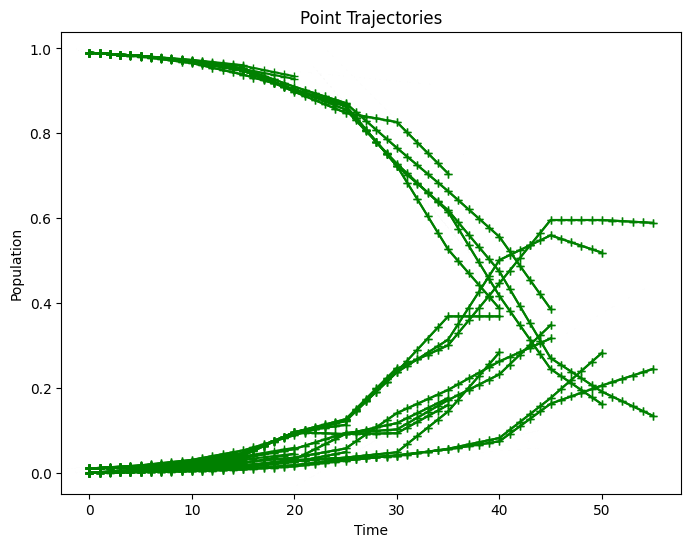

2024-05-01 02:14:40,809 - funman.search.box_search - INFO - progress: 0.12524
2024-05-01 02:14:40,859 - funman.representation.box - INFO - Split[[5.00000, 11.00000]](gamma[(0.0861875, 0.09379296875)][(0.09379296875, 0.1013984375)])
2024-05-01 02:14:40,860 - funman.representation.box - INFO - widths: 0.01521 -> 0.00761 0.00761 (raw), 0.08006 -> 0.05780 0.05780 (norm)
2024-05-01 02:14:40,860 - funman.api.run - INFO - Creating plot of parameter space: ./out/9329c765-b5ca-4be3-aac9-8e4ea3a7c126_parameter_space.png
2024-05-01 02:14:40,862 - funman.search.box_search - INFO - progress: 0.12524
2024-05-01 02:14:40,956 - funman.representation.box - INFO - Split[[3.00000, 11.00000]](gamma[(0.096328125, 0.10393359375)][(0.10393359375, 0.10646875)])
2024-05-01 02:14:40,957 - funman.representation.box - INFO - widths: 0.01014 -> 0.00761 0.00254 (raw), 0.05337 -> 0.04003 0.02283 (norm)
2024-05-01 02:14:40,958 - funman.search.box_search - INFO - progress: 0.12524
2024-05-01 02:14:41,208 - funman.sear

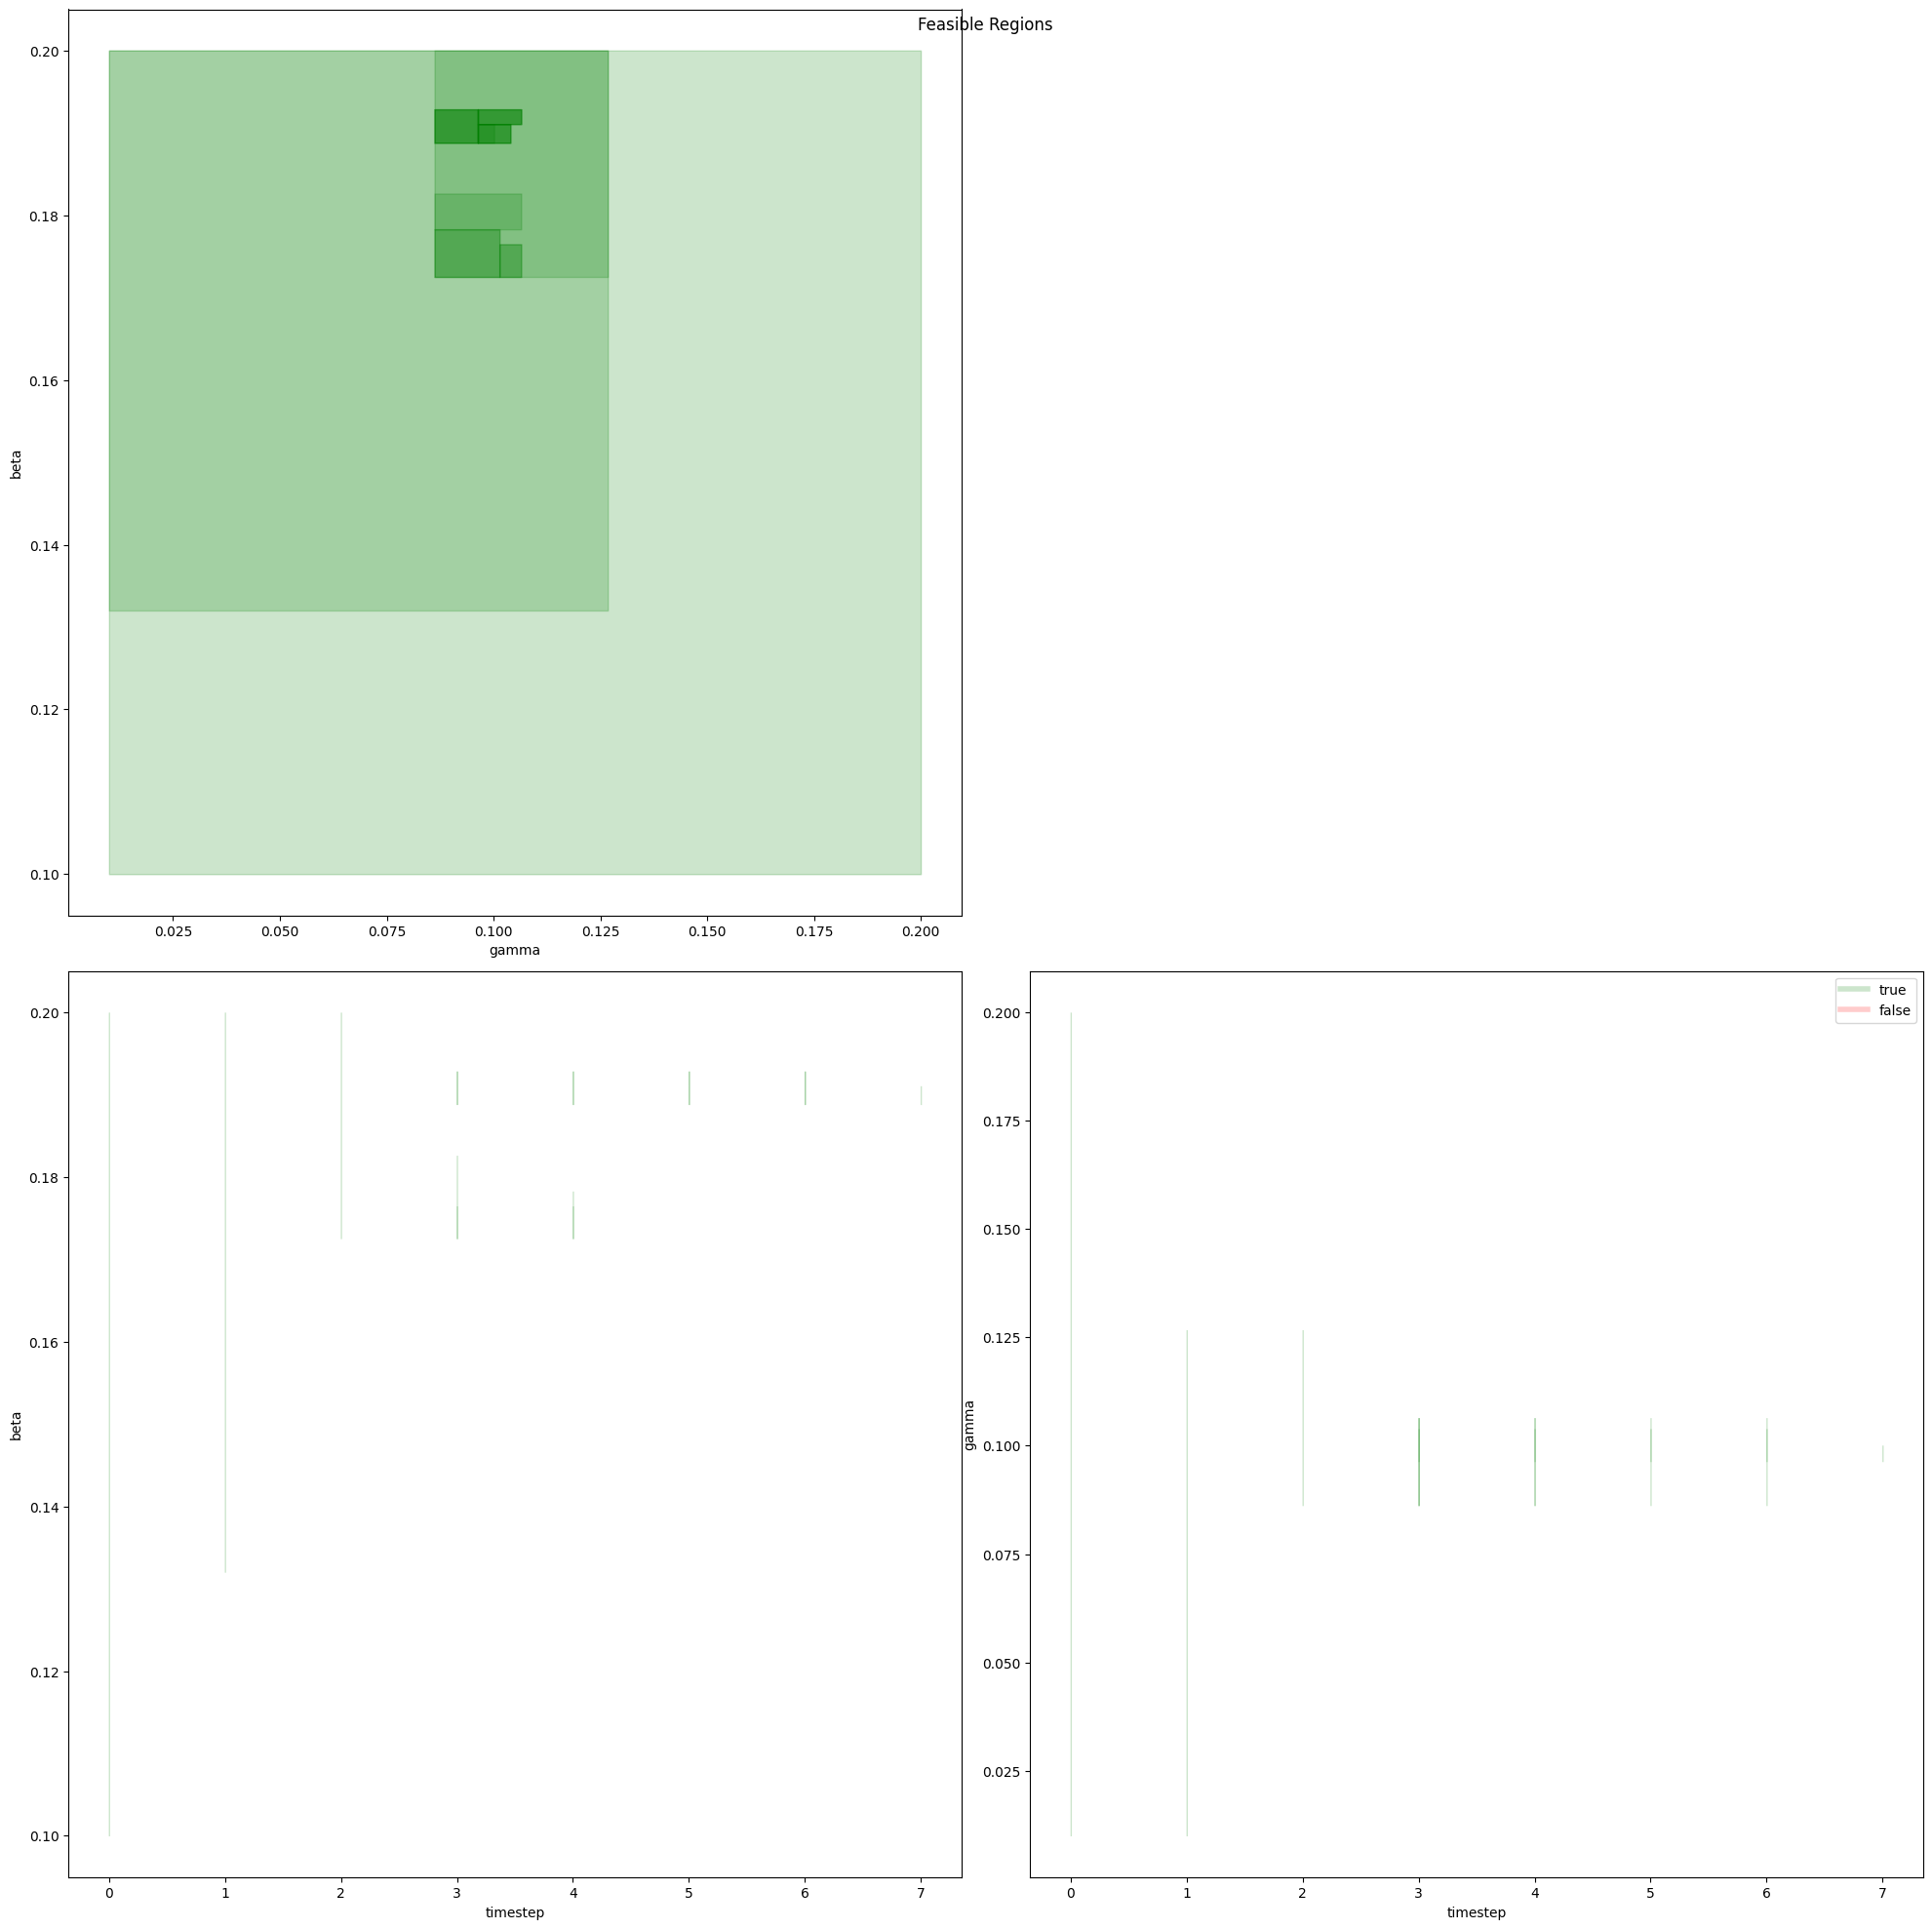

2024-05-01 02:14:57,663 - funman.representation.box - INFO - Split[[7.00000, 11.00000]](gamma[(0.0861875, 0.08919799804687499)][(0.08919799804687499, 0.09220849609374998)])
2024-05-01 02:14:57,664 - funman.representation.box - INFO - widths: 0.00602 -> 0.00301 0.00301 (raw), 0.03169 -> 0.02556 0.02556 (norm)
2024-05-01 02:14:57,666 - funman.search.box_search - INFO - progress: 0.16003
2024-05-01 02:14:57,732 - funman.representation.box - INFO - Split[[5.00000, 11.00000]](gamma[(0.0861875, 0.09506054687499998)][(0.09506054687499998, 0.1013984375)])
2024-05-01 02:14:57,733 - funman.representation.box - INFO - widths: 0.01521 -> 0.00887 0.00634 (raw), 0.08006 -> 0.04670 0.03352 (norm)
2024-05-01 02:14:57,735 - funman.search.box_search - INFO - progress: 0.16003
2024-05-01 02:14:58,155 - funman.search.box_search - INFO - progress: 0.16016
2024-05-01 02:14:58,235 - funman.search.box_search - INFO - progress: 0.16029
2024-05-01 02:14:58,332 - funman.search.box_search - INFO - progress: 0.160

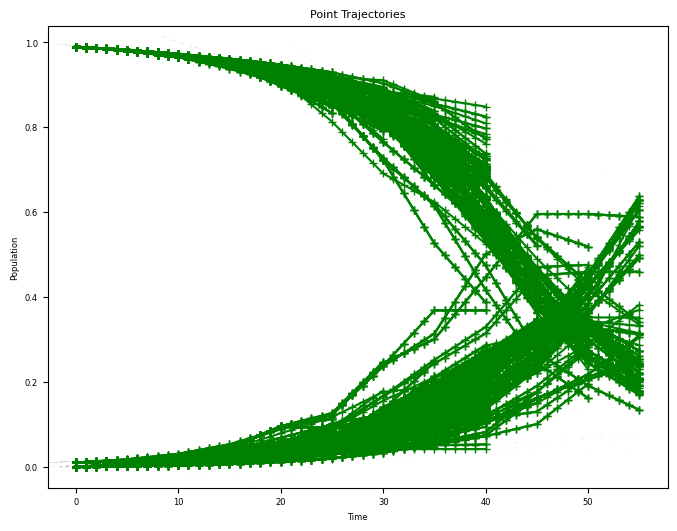

2024-05-01 02:15:59,086 - funman.api.run - INFO - Creating plot of parameter space: ./out/9329c765-b5ca-4be3-aac9-8e4ea3a7c126_parameter_space.png
2024-05-01 02:15:59,147 - funman.representation.box - INFO - Split[[6.00000, 11.00000]](gamma[(0.09933862304687499, 0.10036853027343749)][(0.10036853027343749, 0.1013984375)])
2024-05-01 02:15:59,157 - funman.representation.box - INFO - widths: 0.00206 -> 0.00103 0.00103 (raw), 0.01084 -> 0.00691 0.00691 (norm)
2024-05-01 02:15:59,166 - funman.search.box_search - INFO - progress: 0.19057
2024-05-01 02:15:59,437 - funman.representation.box - INFO - Split[[3.00000, 11.00000]](beta[(0.13200757575757577, 0.13524095939867425)][(0.13524095939867425, 0.13847434303977274)])
2024-05-01 02:15:59,443 - funman.representation.box - INFO - widths: 0.00647 -> 0.00323 0.00323 (raw), 0.06467 -> 0.03233 0.03233 (norm)
2024-05-01 02:15:59,447 - funman.search.box_search - INFO - progress: 0.19057
2024-05-01 02:15:59,513 - funman.representation.box - INFO - Spli

In [2]:
# Parameter Synthesis

STATES = ["S", "I", "R"]
COMPARTMENTS = STATES
MAX_TIME=55
STEP_SIZE=5
to_synthesize=["beta", "gamma"]

REQUEST_PATH = os.path.join(
    EXAMPLE_DIR, "sir_request_param_synth.json"
)

with open(REQUEST_PATH, "r") as request:
    funman_request = FunmanWorkRequest.model_validate(json.load(request))
 
    funman_request.structure_parameters[0].interval.lb = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[0].interval.ub = int(MAX_TIME/STEP_SIZE)
    funman_request.structure_parameters[1].interval.lb = STEP_SIZE
    funman_request.structure_parameters[1].interval.ub = STEP_SIZE

    # funman_request.parameter("gamma").interval.lb = 0.025
    # funman_request.parameter("gamma").interval.ub = 0.03
    # funman_request.parameter("beta").interval.lb = 0.13
    # funman_request.parameter("beta").interval.ub = 0.16

    # funman_request.config.substitute_subformulas = True
    # funman_request.config.taylor_series_order = 4
    # series_approximation_threshold = 1e-8
    # funman_request.config.verbosity = 20
    funman_request.config.tolerance = 1e-2
    funman_request.config.compartmental_constraint_noise = 1e-10
    # funman_request.config.solver_timeout = 2
    # funman_request.config.uniform_box_splits = True
    # funman_request.config.num_initial_boxes = 1

    results_unconstrained_point = Runner().run(
            MODEL_PATH,
            funman_request,
            description="SIR Parameter Synthesis",
            case_out_dir=SAVED_RESULTS_DIR,
            dump_plot=True,
            parameters_to_plot=to_synthesize+["timestep"]
    )
    summary = summarize_results(COMPARTMENTS, results_unconstrained_point, ylabel="Population", parameters_to_plot=to_synthesize+["timestep"], synthesized_parameters=to_synthesize+["timestep"])
    print(summary)